<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/RandomForestClassifier/mega_model_classifier_melb_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.8 MB/s eta 0:00:00


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('melb_data1.csv')

# Tính trung bình cộng giá
average_price = df['Price'].mean()

print(f"Trung bình cộng giá: {average_price}")

Trung bình cộng giá: 1075684.079455081


In [4]:
df.shape

(13580, 19)

In [8]:
def encode_price(value):
    if value < average_price:
        return 0
    else:
        return 1

# Áp dụng hàm mã hóa lên cột Price
df['Encoded_Price'] = df['Price'].apply(encode_price)

print(df)

               Suburb            Address  Rooms Type    Price        SellerG  \
0        Airport West      154 Halsey Rd      3    t   840000         Nelson   
1         Albert Park     105 Kerferd Rd      2    h  1275000  hockingstuart   
2         Albert Park   85 Richardson St      2    h  1455000        Thomson   
3          Alphington         6 Smith St      4    h  2000000          Brace   
4          Alphington    5/6 Yarralea St      3    h  1110000         Jellis   
...               ...                ...    ...  ...      ...            ...   
13575  West Footscray    32 Richelieu St      5    h  1030000        Village   
13576  West Footscray     121 Suffolk St      3    h   878000        Village   
13577          Albion       3 Barclay St      2    h   460000          Barry   
13578          Albion     5/25 Ridley St      2    u   190000        Burnham   
13579        Oakleigh  9/126 Atherton Rd      3    u   665000        O'Brien   

             Date  Distance  Postcode  

In [9]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
df.shape

(13580, 20)

In [11]:
# Tính ma trận tương quan giữa các thuộc tính
correlation_matrix = df.corr()

# Sắp xếp theo độ tương quan với cột 'Price' giảm dần
correlation_with_price = correlation_matrix['Price'].abs().sort_values(ascending=False)
print(correlation_with_price)



Price            1.000000
Encoded_Price    0.744073
Rooms            0.496634
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64


In [12]:
selected_columns = ['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Encoded_Price', 'Regionname', 'Price']
df = df[selected_columns]

In [13]:
df.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Encoded_Price,Regionname,Price
0,t,3,13.5,2,1.0,303,225.0,2016.0,0,Western Metropolitan,840000
1,h,2,3.3,1,0.0,120,82.0,1900.0,1,Southern Metropolitan,1275000
2,h,2,3.3,1,0.0,159,NaN,NaN,1,Southern Metropolitan,1455000
3,h,4,6.4,2,4.0,853,263.0,1930.0,1,Northern Metropolitan,2000000
4,h,3,6.4,2,2.0,208,NaN,2013.0,1,Northern Metropolitan,1110000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6830 non-null   object 
 1   Rooms          6830 non-null   int64  
 2   Distance       6830 non-null   float64
 3   Bathroom       6830 non-null   int64  
 4   Car            6830 non-null   float64
 5   Landsize       6830 non-null   int64  
 6   BuildingArea   6830 non-null   float64
 7   YearBuilt      6830 non-null   float64
 8   Encoded_Price  6830 non-null   int64  
 9   Regionname     6830 non-null   object 
 10  Price          6830 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 587.1+ KB


In [17]:
df_dropna=df.dropna()
df = df_dropna.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6830 non-null   object 
 1   Rooms          6830 non-null   int64  
 2   Distance       6830 non-null   float64
 3   Bathroom       6830 non-null   int64  
 4   Car            6830 non-null   float64
 5   Landsize       6830 non-null   int64  
 6   BuildingArea   6830 non-null   float64
 7   YearBuilt      6830 non-null   float64
 8   Encoded_Price  6830 non-null   int64  
 9   Regionname     6830 non-null   object 
 10  Price          6830 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 587.1+ KB


In [18]:
col_names = [['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Encoded_Price', 'Regionname', 'Price']]


for col in col_names:
    
    print(df[col].value_counts())   

Type  Rooms  Distance  Bathroom  Car  Landsize  BuildingArea  YearBuilt  Encoded_Price  Regionname                  Price  
t     3      5.2       2         1.0  0         112.0         1900.0     0              Northern Metropolitan       641000     2
u     2      2.4       2         2.0  180       123.0         1940.0     0              Northern Metropolitan       890500     2
             11.2      1         2.0  132       83.0          1980.0     0              Northern Metropolitan       440000     2
t     3      7.8       2         2.0  531       112.0         2016.0     0              Northern Metropolitan       720000     2
h     4      21.5      2         2.0  597       150.0         1970.0     1              South-Eastern Metropolitan  1300000    2
                                                                                                                              ..
      3      13.5      1         4.0  699       125.0         1960.0     0              Western Metrop

In [20]:
df['Encoded_Price'].value_counts()

0    4246
1    2584
Name: Encoded_Price, dtype: int64

In [21]:
# check missing values in variables

df.isnull().sum()

Type             0
Rooms            0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Encoded_Price    0
Regionname       0
Price            0
dtype: int64

In [22]:
# filling null values with zero

df.fillna(0, inplace = True)

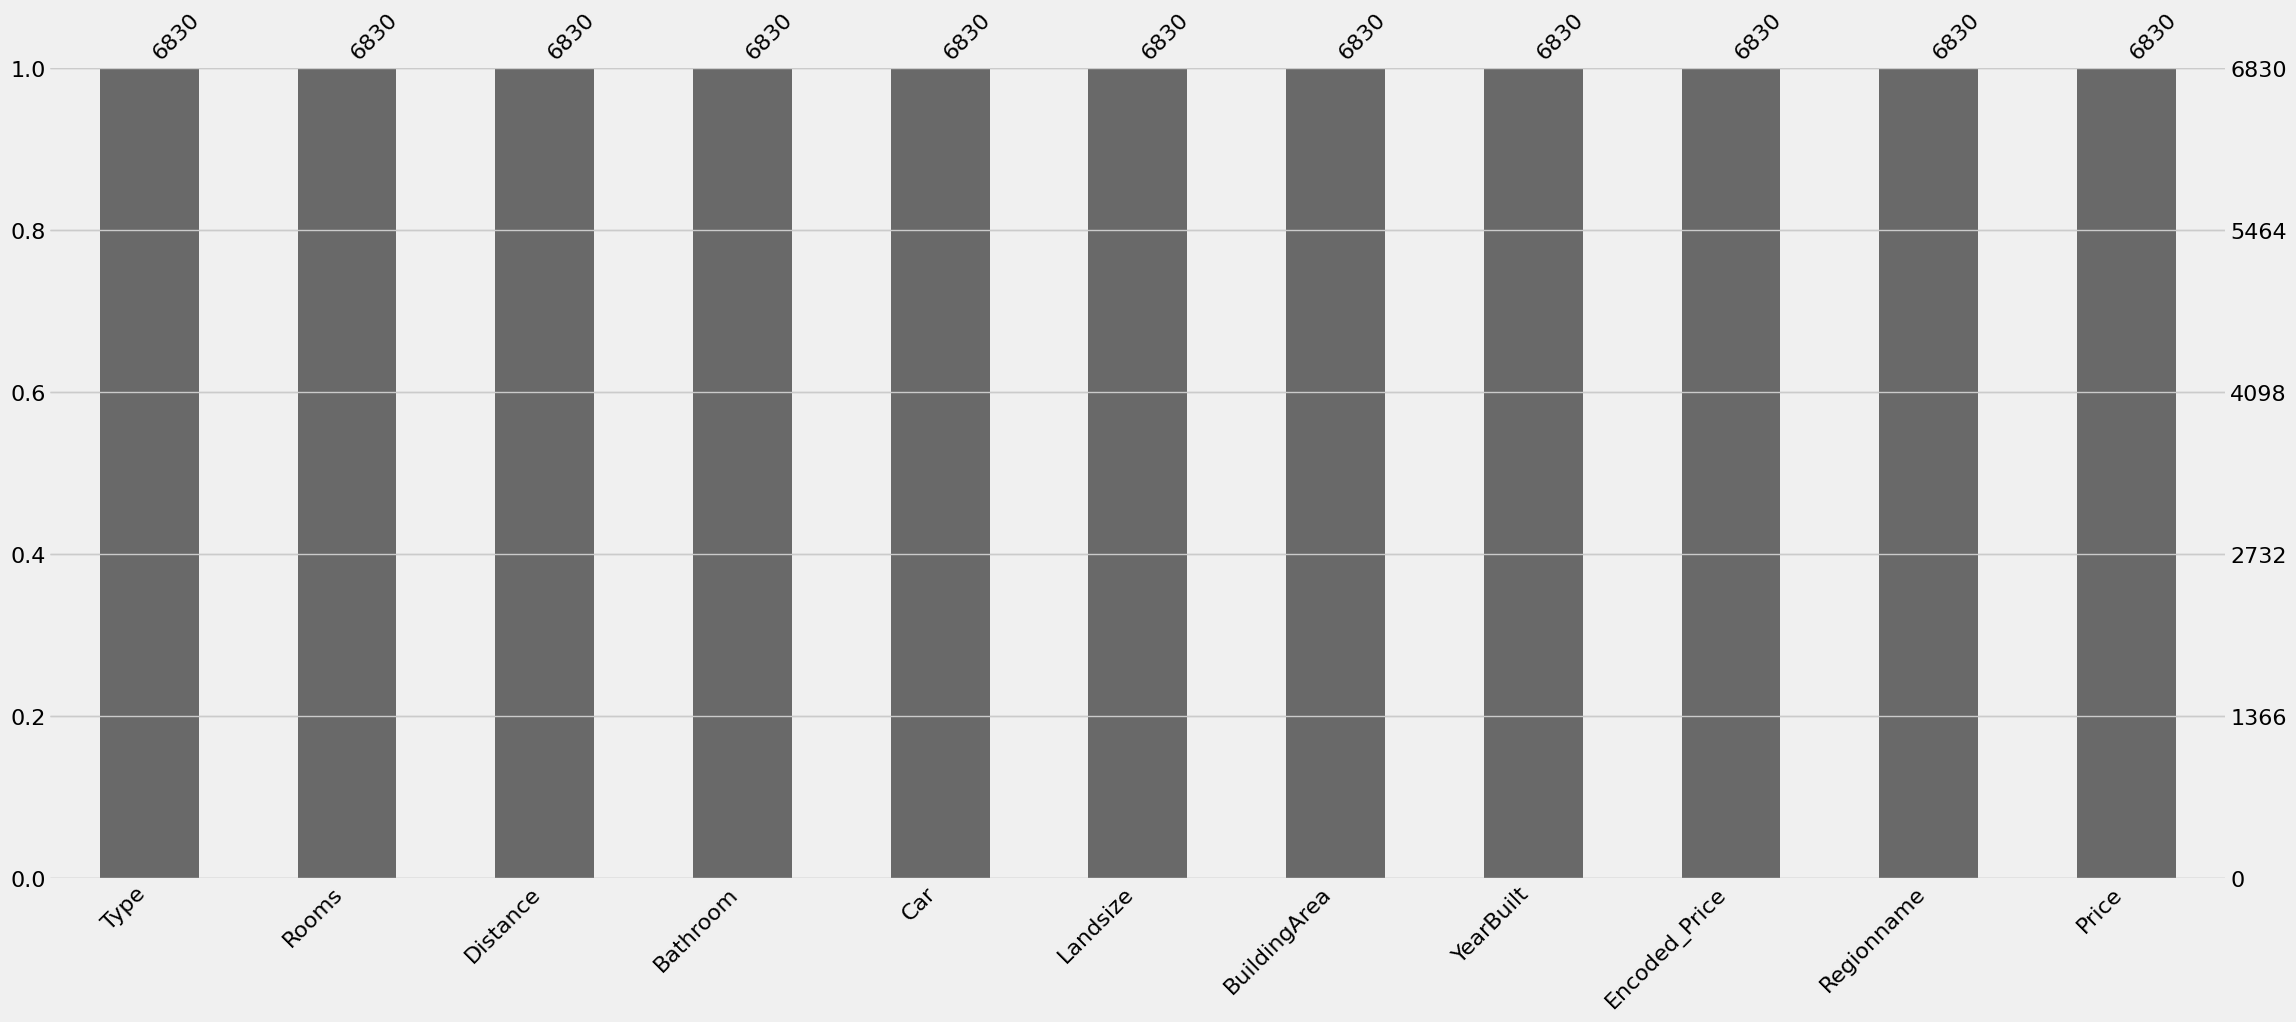

In [23]:
# visualizing null values
msno.bar(df)
plt.show()

In [24]:
# import category encoders
!pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.2 MB/s eta 0:00:00


In [26]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Encoded_Price', 'Regionname', 'Price'])


df = encoder.fit_transform(df)

In [27]:
df

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Encoded_Price,Regionname,Price
0,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2,2
2,2,3,3,1,3,3,3,3,2,3,3
3,2,1,4,1,1,4,4,4,1,1,4
4,2,4,5,3,4,5,5,5,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...
6825,2,1,65,3,5,263,560,45,1,4,410
6826,2,1,65,2,5,7,19,12,2,4,474
6827,3,5,22,2,1,7,149,13,1,1,1299
6828,1,2,36,2,1,476,38,8,1,2,1647


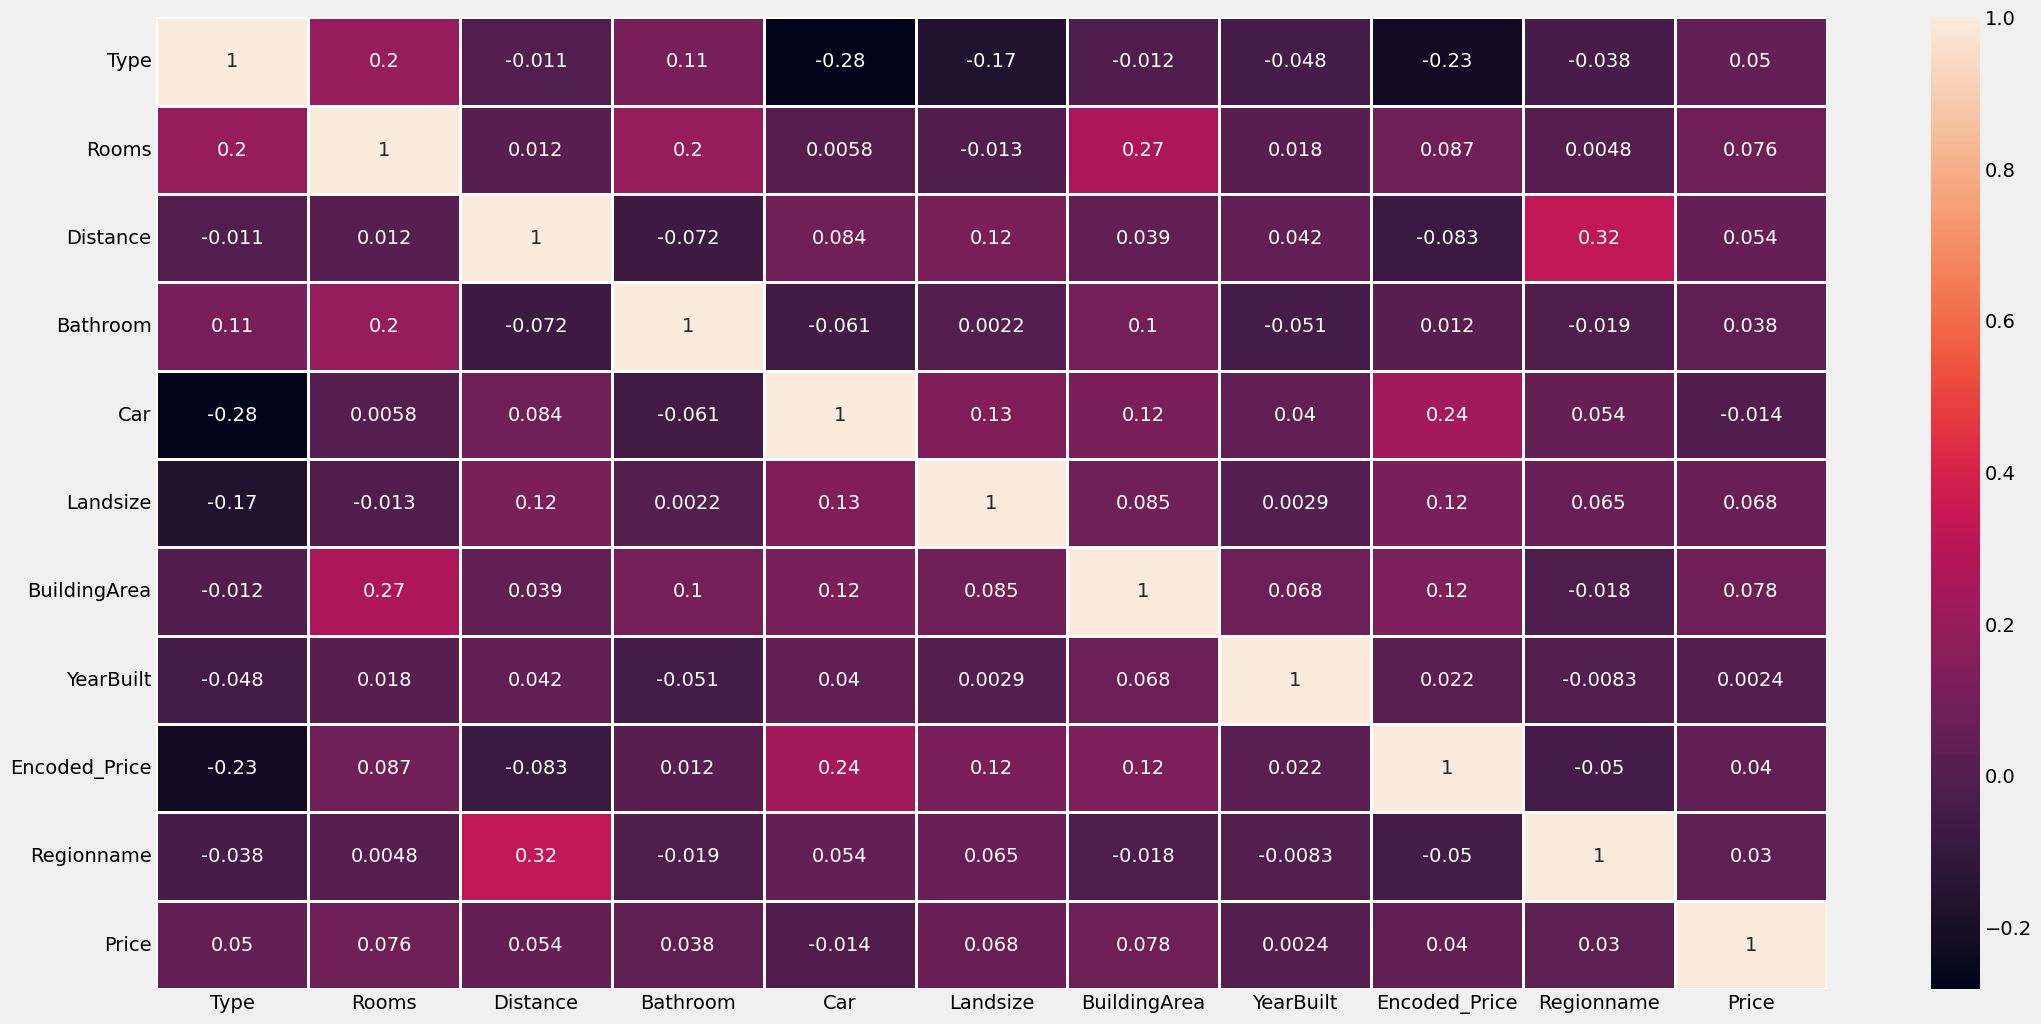

In [28]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [29]:
correlation = df.corr()['Encoded_Price'].abs().sort_values(ascending = False)
correlation

Encoded_Price    1.000000
Car              0.242526
Type             0.231270
BuildingArea     0.124313
Landsize         0.116302
Rooms            0.086655
Distance         0.083239
Regionname       0.049627
Price            0.039615
YearBuilt        0.021808
Bathroom         0.012242
Name: Encoded_Price, dtype: float64

In [30]:
# printing unique values of each column
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

Type: 
[1 2 3]

Rooms: 
[1 2 3 4 5 6 7 8]

Distance: 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197]

Bathroom: 
[1 2 3 4 5 6 7 8]

Car: 
[ 1  2  3  4  5  6  7  8  9 10 11]

Landsize: 
[   1    2    3 ... 1159 1160 1161]

BuildingArea: 
[  1   2  

In [31]:
X = df.drop(['Encoded_Price'], axis=1)
y = df['Encoded_Price']

In [32]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4576, 10), (2254, 10))

In [34]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [35]:
X_train.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Price
1585,3,2,25,2,1,422,37,13,4,10
5669,2,2,147,1,5,749,55,13,4,98
6796,2,2,46,2,1,311,84,33,3,303
3458,2,4,135,3,5,960,229,13,4,136
977,2,3,37,3,5,530,99,44,2,47


In [36]:
X_test.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Price
6663,2,1,162,1,1,540,218,13,4,786
1724,2,2,6,2,2,311,125,2,1,95
374,2,3,43,1,1,264,4,4,2,284
4399,3,1,35,1,5,36,156,14,2,1249
4070,2,1,16,2,1,182,70,6,3,96


In [37]:
y_train.head(), y_test.head()

(1585    1
 5669    1
 6796    1
 3458    2
 977     2
 Name: Encoded_Price, dtype: int64,
 6663    1
 1724    1
 374     2
 4399    1
 4070    1
 Name: Encoded_Price, dtype: int64)

**Logistic Regression**

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.6442166910688141
Confusion Matrix : 
[[1014  233]
 [ 496  306]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.67      0.81      0.74      1247
           2       0.57      0.38      0.46       802

    accuracy                           0.64      2049
   macro avg       0.62      0.60      0.60      2049
weighted avg       0.63      0.64      0.63      2049



**KNN**

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.5949243533430942
Confusion Matrix : 
[[900 347]
 [483 319]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.65      0.72      0.68      1247
           2       0.48      0.40      0.43       802

    accuracy                           0.59      2049
   macro avg       0.56      0.56      0.56      2049
weighted avg       0.58      0.59      0.59      2049



**Decision Tree Classifier**

In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7950219619326501
Confusion Matrix : 
[[1044  203]
 [ 217  585]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.83      0.84      0.83      1247
           2       0.74      0.73      0.74       802

    accuracy                           0.80      2049
   macro avg       0.79      0.78      0.78      2049
weighted avg       0.79      0.80      0.79      2049



**Random Forest Classifier**

In [41]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8506588579795022
Confusion Matrix : 
[[1142  105]
 [ 201  601]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.85      0.92      0.88      1247
           2       0.85      0.75      0.80       802

    accuracy                           0.85      2049
   macro avg       0.85      0.83      0.84      2049
weighted avg       0.85      0.85      0.85      2049



**Ada Boost Classifier**

In [42]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7867252318204002
Confusion Matrix : 
[[1034  213]
 [ 224  578]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.82      0.83      0.83      1247
           2       0.73      0.72      0.73       802

    accuracy                           0.79      2049
   macro avg       0.78      0.77      0.78      2049
weighted avg       0.79      0.79      0.79      2049



**Gradient Boosting Classifier**

In [43]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8628599316739873
Confusion Matrix : 
[[1168   79]
 [ 202  600]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.85      0.94      0.89      1247
           2       0.88      0.75      0.81       802

    accuracy                           0.86      2049
   macro avg       0.87      0.84      0.85      2049
weighted avg       0.86      0.86      0.86      2049



**Cat Boost Classifier**

In [44]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.165993
0:	learn: 0.6327959	total: 49.2ms	remaining: 4.87s
1:	learn: 0.5888762	total: 50.7ms	remaining: 2.48s
2:	learn: 0.5591977	total: 52.2ms	remaining: 1.69s
3:	learn: 0.5364266	total: 53.8ms	remaining: 1.29s
4:	learn: 0.5106470	total: 55.4ms	remaining: 1.05s
5:	learn: 0.4926638	total: 57.1ms	remaining: 894ms
6:	learn: 0.4773108	total: 58.8ms	remaining: 781ms
7:	learn: 0.4654444	total: 60.7ms	remaining: 698ms
8:	learn: 0.4548127	total: 62.3ms	remaining: 630ms
9:	learn: 0.4475457	total: 64ms	remaining: 576ms
10:	learn: 0.4404534	total: 65.7ms	remaining: 531ms
11:	learn: 0.4341341	total: 68.3ms	remaining: 501ms
12:	learn: 0.4284233	total: 69.6ms	remaining: 466ms
13:	learn: 0.4240891	total: 71.2ms	remaining: 437ms
14:	learn: 0.4191751	total: 72.8ms	remaining: 413ms
15:	learn: 0.4162976	total: 74.3ms	remaining: 390ms
16:	learn: 0.4121377	total: 75.9ms	remaining: 371ms
17:	learn: 0.4079583	total: 77.4ms	remaining: 353ms
18:	learn: 0.4048371	total: 78.9ms	remaining: 

In [45]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8799414348462665
Confusion Matrix : 
[[1171   76]
 [ 170  632]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.87      0.94      0.90      1247
           2       0.89      0.79      0.84       802

    accuracy                           0.88      2049
   macro avg       0.88      0.86      0.87      2049
weighted avg       0.88      0.88      0.88      2049



**Extra Trees Classifier**

In [46]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8296730112249878
Confusion Matrix : 
[[1127  120]
 [ 229  573]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.83      0.90      0.87      1247
           2       0.83      0.71      0.77       802

    accuracy                           0.83      2049
   macro avg       0.83      0.81      0.82      2049
weighted avg       0.83      0.83      0.83      2049



**LGBM Classifier**

In [47]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9043435822352367
Confusion Matrix : 
[[1160   87]
 [ 109  693]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.91      0.93      0.92      1247
           2       0.89      0.86      0.88       802

    accuracy                           0.90      2049
   macro avg       0.90      0.90      0.90      2049
weighted avg       0.90      0.90      0.90      2049



**Models Comparison**

In [48]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Cat Boost', 'Extra Trees Classifier', 'LGBM'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_cat, acc_etc, acc_lgbm]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,LGBM,0.904344
6,Cat Boost,0.879941
5,Gradient Boosting Classifier,0.862860
3,Random Forest Classifier,0.850659
7,Extra Trees Classifier,0.829673
2,Decision Tree Classifier,0.795022
4,Ada Boost Classifier,0.786725
0,Logistic Regression,0.644217
1,KNN,0.594924


In [49]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')